Importing the requtred packages and reading the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import datetime as dt
from dateutil.parser import parse
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.optimize import newton
#from scipy.special import psi, polygamma
from scipy.stats import norm, kde, kstest
from numpy import inf,linspace
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('google_drive_nanreplaced.csv')

In [2]:
df.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


Creating a data frame with required columns here they are the google_spreadsheets_created and the google_spreadsheets_edited

In [3]:
data1= df[['time', 'google_spreadsheets_created']]
data2= df[['time', 'google_spreadsheets_edited']]
data1.head()

,time,google_spreadsheets_created
0,2017-03-12 05:00:00,0.0
1,2017-03-14 04:00:00,0.0
2,2017-03-16 04:00:00,0.0
3,2017-03-19 04:00:00,0.0
4,2017-03-20 04:00:00,0.0


In [4]:
data1.describe()

,google_spreadsheets_created
count,831.00000
mean,138.61658
std,84.31469
min,0.00000
25%,68.00000
50%,138.61658
75%,203.00000
max,534.00000


In [5]:
data2.describe()

,google_spreadsheets_edited
count,831.000000
mean,609.936528
std,346.449582
min,0.000000
25%,289.000000
50%,609.936528
75%,901.000000
max,1363.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD895CA2B0>]],
      dtype=object)

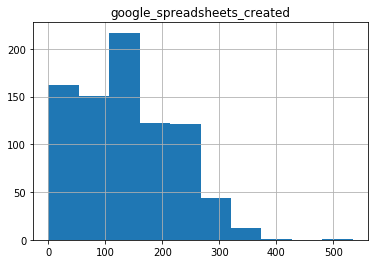

In [6]:
data1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD89315908>]],
      dtype=object)

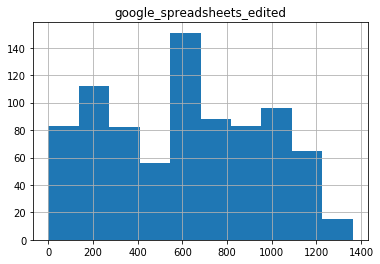

In [7]:
data2.hist()

In [8]:
data1['time'] = pd.to_datetime(data1['time'],utc=True)
data1.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

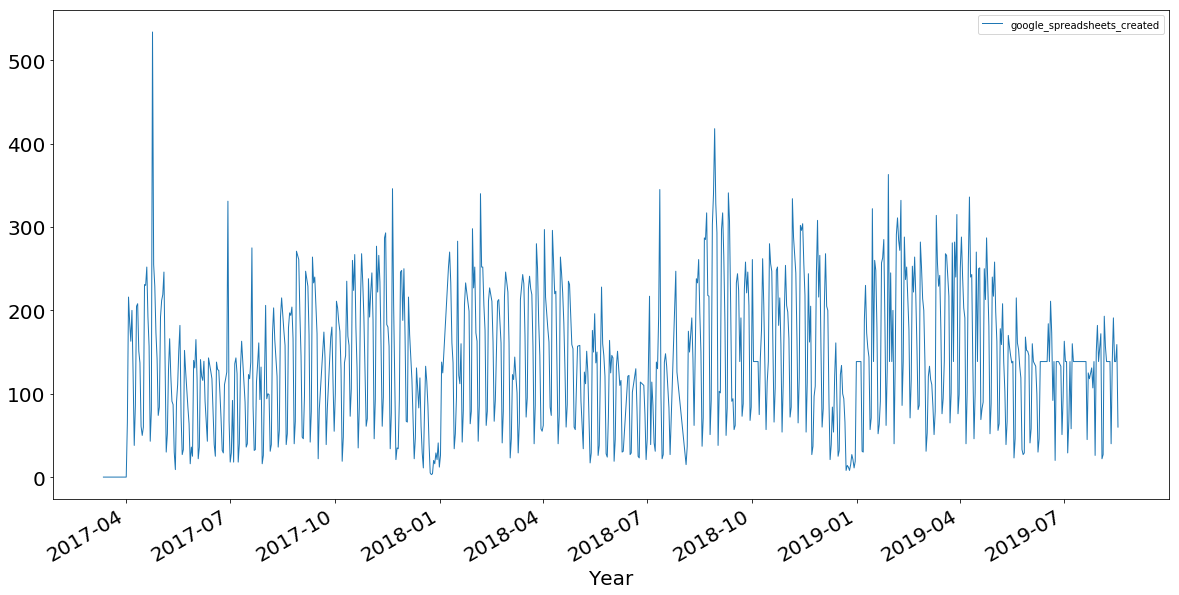

In [9]:
data1.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [10]:
data2['time'] = pd.to_datetime(data2['time'],utc=True)
data2.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

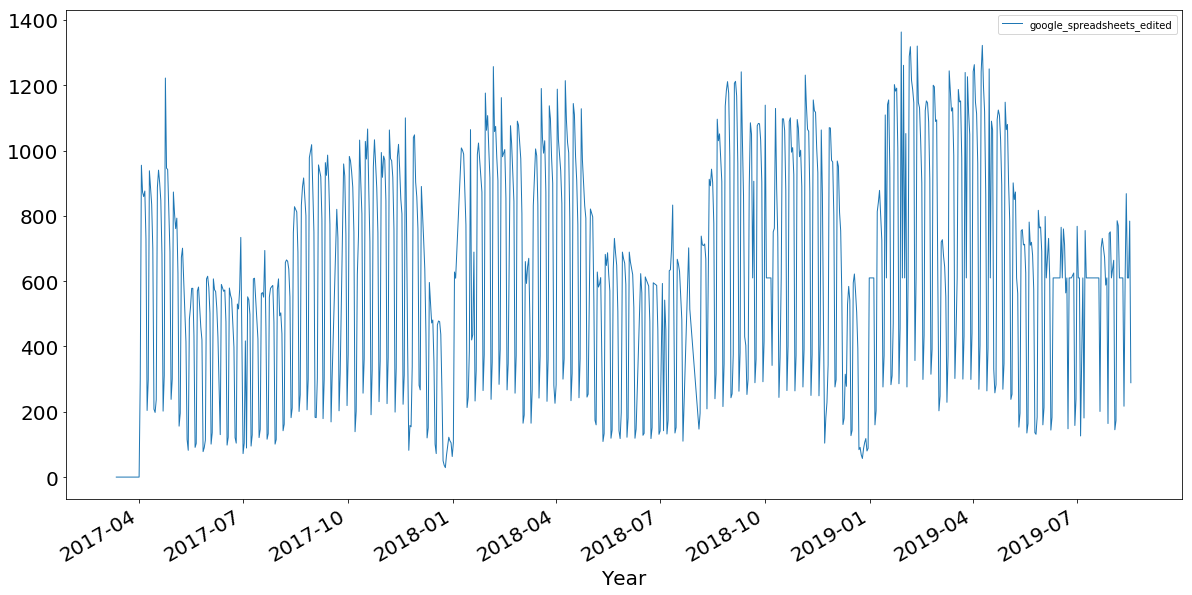

In [11]:
data2.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [12]:
alpha= norm.fit(df['google_spreadsheets_created'])[0]
beta= norm.fit(df['google_spreadsheets_created'])[1]
oiu= df['google_spreadsheets_created']
density= kde.gaussian_kde(oiu,bw_method=None)

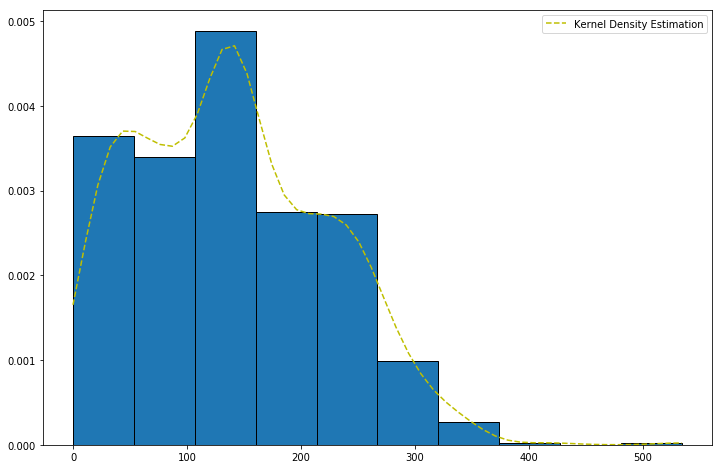

In [13]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [14]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])

In [15]:
kstest(oiu,my_cdf)

KstestResult(statistic=0.04280763164644752, pvalue=0.09241797662292583)

In [16]:
alpha= norm.fit(df['google_spreadsheets_edited'])[0]
beta= norm.fit(df['google_spreadsheets_edited'])[1]
oiu= df['google_spreadsheets_edited']
density= kde.gaussian_kde(oiu,bw_method=None)

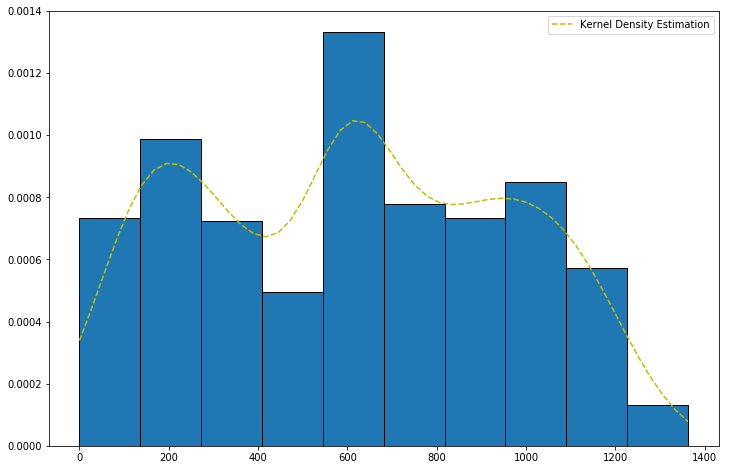

In [17]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [18]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])
kstest(oiu,my_cdf)

KstestResult(statistic=0.03971445342470581, pvalue=0.14157499861768685)

In [19]:
data1= df['google_forms_created']
users_sample= np.random.choice(a= data1,size= 300)
print(users_sample.mean())

26.596416234887737


In [20]:
data1.mean()-users_sample.mean()

-0.17931778929187914

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD896F0E80>]],
      dtype=object)

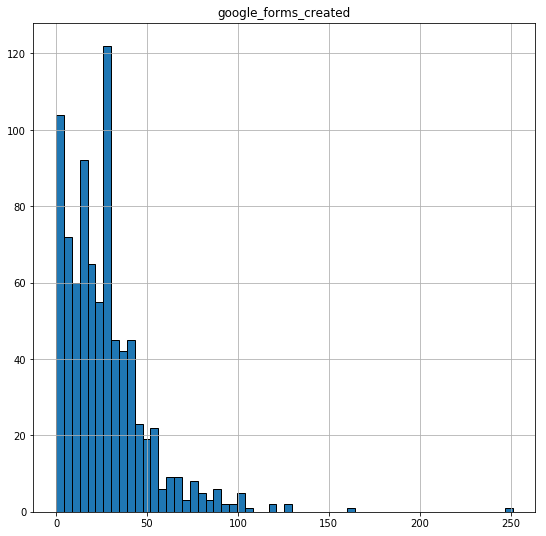

In [21]:
pd.DataFrame(data1).hist(bins=58,figsize=(9,9), ec='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD8A73D0F0>]],
      dtype=object)

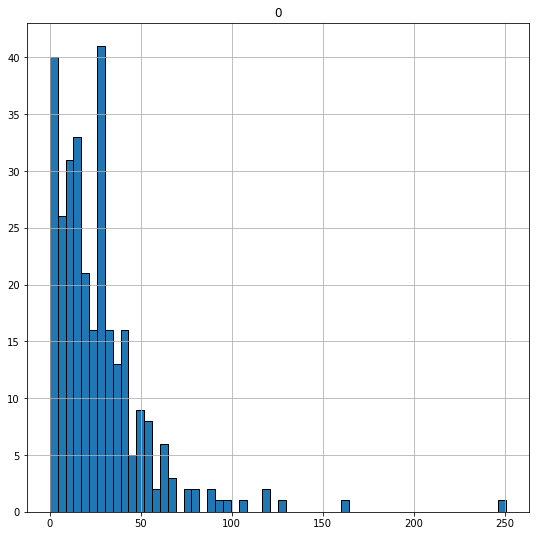

In [22]:
pd.DataFrame(users_sample).hist(bins=58,figsize=(9,9), ec='black')

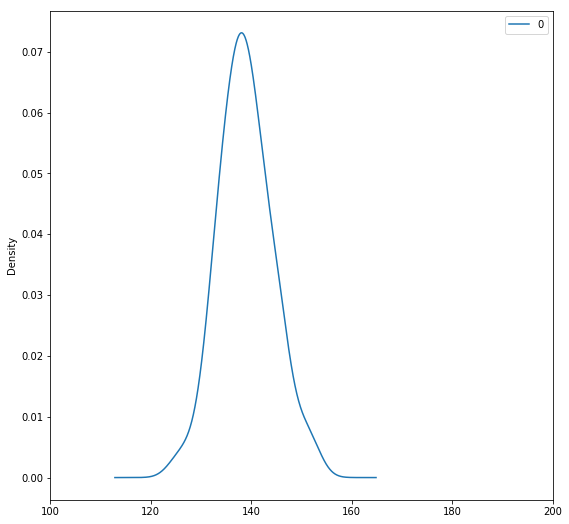

In [36]:
point_estimates = []         # Make empty list to hold point estimates
data1=df['google_spreadsheets_created']
for x in range(50):         # Generate 200 samples
    sample = np.random.choice(a= data1, size=300)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(100,200)) 

In [25]:
data1.mean()- np.array(point_estimates).mean()

0.28733402417962495

In [37]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
137.46804835924004
Confidence interval:
(127.92711837049586, 147.00897834798423)


In [38]:
np.random.seed(12)

sample_size = 300

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data1, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

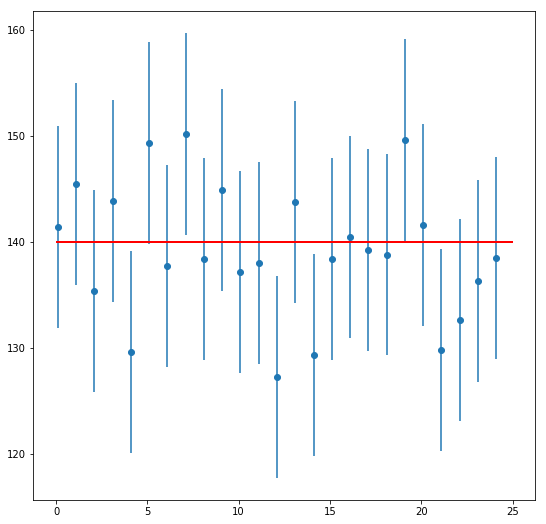

In [41]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=140, 
           linewidth=2.0,
           color="red")

In [40]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=299)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9679296690653618
Confidence interval:
(128.22319591853835, 146.71290079994174)


In [31]:
# Check the difference between critical values with a sample size of 200
             
stats.t.ppf(q=0.975, df= 299) - stats.norm.ppf(0.975)  

0.011992559709340878

In [32]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 299,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(23.063715618016804, 27.719134122915843)

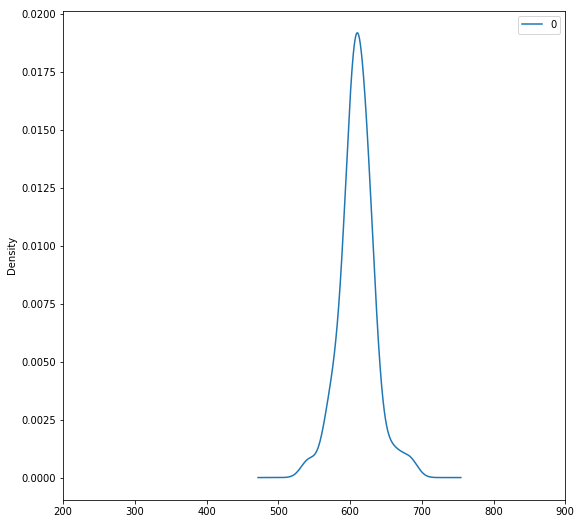

In [44]:
point_estimates = []         # Make empty list to hold point estimates
data2=df['google_spreadsheets_edited']
for x in range(50):         # Generate 300 samples
    sample = np.random.choice(a= data2, size=300)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(200,900)) 

In [45]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
609.4080440414508
Confidence interval:
(599.8671140527066, 618.948974030195)


In [46]:
np.random.seed(12)

sample_size = 300

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data2, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

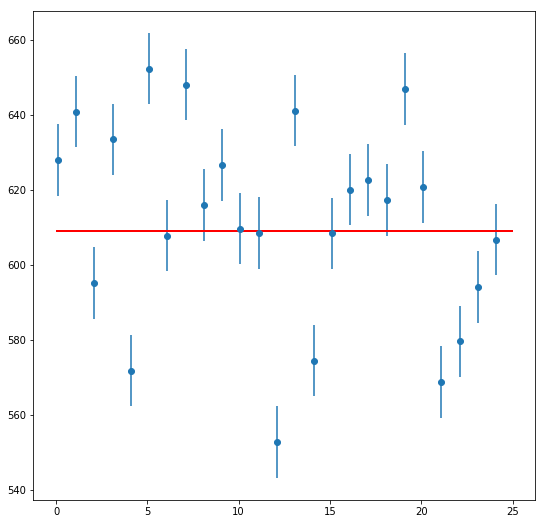

In [48]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=609, 
           linewidth=2.0,
           color="red")

In [49]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=299)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9679296690653618
Confidence interval:
(569.7360380509573, 649.0800500319443)


In [50]:
# Check the difference between critical values with a sample size of 300
             
stats.t.ppf(q=0.975, df= 299) - stats.norm.ppf(0.975)  

0.00796568452530777

In [51]:
pd.DataFrame(df.groupby('time')['google_spreadsheets_created'].count()).sum()

google_spreadsheets_created    831
dtype: int64

In [52]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.831                              # Point estimate of proportion

n = 300                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval

(0.7885936075840971, 0.8734063924159028)

In [53]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.831,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.7885936075840971, 0.8734063924159028)

In [54]:

data1=df['google_spreadsheets_created']
data2=df['google_spreadsheets_edited']
np.cov(data1, data2)[0,1]

27764.284593295462

In [55]:
print('Covariance of X and Y: %.2f'%np.cov(data1, data2)[0, 1])
print('Correlation of X and Y: %.2f'%np.corrcoef(data1, data2)[0, 1])

Covariance of X and Y: 27764.28
Correlation of X and Y: 0.95


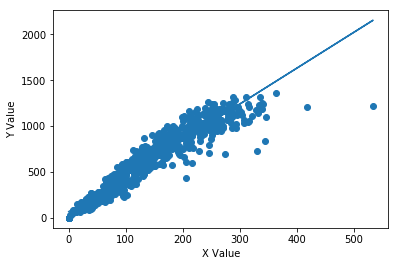

Correlation of X and Y: 0.95


In [56]:
X = data1
Y = data2

m, b = np.polyfit(X, Y, 1)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.plot(X, m*X + b, '-')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

In [57]:
datasample_forms_created= np.random.choice(a= data1, size = 300)

In [58]:
datasample_forms_edited= np.random.choice(a= data2, size = 300)

In [63]:
data = df[['time','google_spreadsheets_created']]

data['time'] = pd.to_datetime(data['time'],utc=True)
data.set_index('time', inplace=True)
data.head()

,google_spreadsheets_created
time,
2017-03-12 05:00:00+00:00,0.0
2017-03-14 04:00:00+00:00,0.0
2017-03-16 04:00:00+00:00,0.0
2017-03-19 04:00:00+00:00,0.0
2017-03-20 04:00:00+00:00,0.0


In [70]:
aprildata= data['2017-04'].append(data['2018-04'])
aprildata.describe()

,google_spreadsheets_created
count,57.000000
mean,158.473684
std,92.402672
min,0.000000
25%,74.000000
50%,159.000000
75%,221.000000
max,534.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD909C9DA0>]],
      dtype=object)

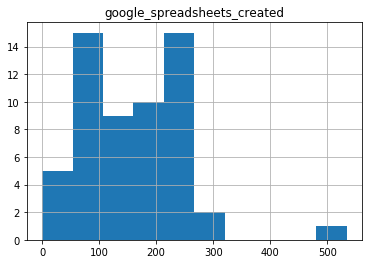

In [67]:
aprildata.hist()

In [71]:
maydata=data['2017-05'].append(data['2018-05'])
maydata.describe()

,google_spreadsheets_created
count,59.000000
mean,109.220339
std,62.261425
min,9.000000
25%,45.000000
50%,125.000000
75%,151.500000
max,246.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD90A28240>]],
      dtype=object)

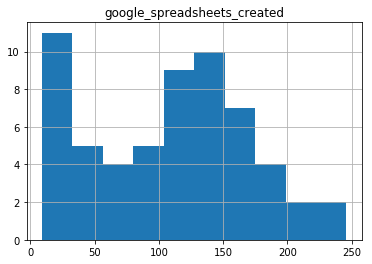

In [69]:
maydata.hist()

In this hypothesis testing i have taking the data of th eapriil month an dmay month and i am comparing this with the overall dat amean and see if the monthly data is largely varies from the overall data 

In [73]:

stats.ttest_1samp(a= aprildata,               # Sample data
                 popmean= data.mean())  # Pop mean

Ttest_1sampResult(statistic=google_spreadsheets_created    1.622441
dtype: float64, pvalue=array([0.11032611]))

Here p value is 0.11> 0.05 so we accept the null hypothesis , this means the mean of th eapril data is almost similar to the mean of the overall data.

In [74]:

stats.ttest_1samp(a= maydata,               # Sample data
                 popmean= data.mean())  # Pop mean

Ttest_1sampResult(statistic=google_spreadsheets_created   -3.626592
dtype: float64, pvalue=array([0.00060716]))

Here the p value, 0.0006 <0.05, so we reject the null hypothesis. it means the mean of the may data varies form the mean of the original data.

In [75]:
print(aprildata.mean())
print(maydata.mean())

google_spreadsheets_created    158.473684
dtype: float64
google_spreadsheets_created    109.220339
dtype: float64


In [76]:
stats.ttest_ind(a= aprildata,
                b= maydata,
                equal_var=False) 

Ttest_indResult(statistic=array([3.35517406]), pvalue=array([0.00113032]))

In the above we are comparing the may data and the april data, by th eabove p value, 0.001<0.05 we can infer that the april data is different from the may data .